# CUSTOMER CHURN ANALYSIS IN TELECOM INDUSTRY

## Imports and Readings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import missingno as msno

In [124]:
path = "C:/Users/termi/Desktop/data.csv"
data = pd.read_csv(path)

## Adding Some Missing Values and Outliers

### Adding Outliers

In [125]:
# Faulty data type converted from String to numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

# Convert numeric columns to float if they are not already
numeric_columns = ["tenure", "MonthlyCharges", "TotalCharges"]
data[numeric_columns] = data[numeric_columns].astype(float)

# Add outliers to numeric columns
outliers_percentage = 0.2
outliers_mask = np.random.rand(data.shape[0], len(numeric_columns)) < outliers_percentage
outliers_values = np.random.normal(loc=0, scale=14, size=(data.shape[0], len(numeric_columns)))

# Apply outliers only to numeric columns
data[numeric_columns] += outliers_mask * outliers_values


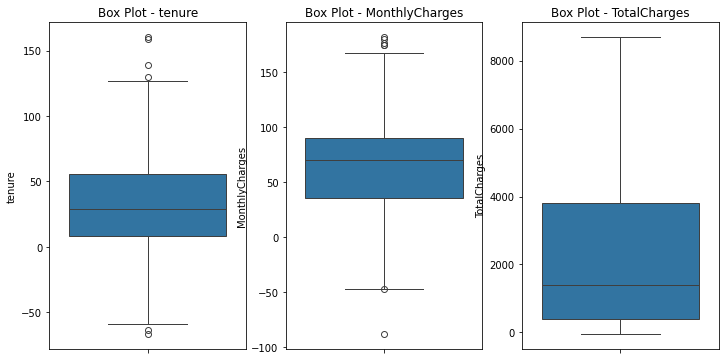

In [126]:
# Create a DataFrame with outliers
outliers_data = data.copy()
outliers_data[numeric_columns] += np.where(outliers_mask, outliers_values, 0)

# Plot box plots for each numeric column
plt.figure(figsize=(12, 6))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=outliers_data[column])
    plt.title(f'Box Plot - {column}')

plt.show()

### Adding Missing Values

In [127]:
# Don't change CustomerID and churn datas
temp_data = data[["customerID", "Churn"]].copy()

# Add missing values (20% of the data)
missing_percentage = 0.20
missing_mask = np.random.rand(data.shape[0], data.shape[1]) < missing_percentage
data[missing_mask] = np.nan

data[["customerID", "Churn"]] = temp_data

In [20]:
# See columns
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,20.098577,No,No phone service,NaN,No,...,No,No,NaN,No,Month-to-month,Yes,Electronic check,2.364593,27.972369,No
1,5575-GNVDE,NaN,NaN,NaN,No,30.674547,Yes,No,DSL,Yes,...,NaN,No,No,No,NaN,No,Mailed check,35.578510,1911.729862,No
2,3668-QPYBK,NaN,0.0,No,No,30.522645,Yes,No,DSL,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,NaN,102.718391,Yes
3,7795-CFOCW,Male,0.0,No,No,NaN,NaN,NaN,DSL,NaN,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),64.526122,1810.864215,No
4,9237-HQITU,Female,0.0,NaN,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,50.981917,163.142479,Yes
5,9305-CDSKC,NaN,0.0,No,No,NaN,Yes,Yes,Fiber optic,NaN,...,Yes,No,Yes,Yes,Month-to-month,NaN,Electronic check,NaN,794.772547,Yes
6,1452-KIOVK,NaN,0.0,No,NaN,41.682846,Yes,NaN,Fiber optic,No,...,NaN,NaN,Yes,No,Month-to-month,Yes,Credit card (automatic),104.259999,NaN,No
7,6713-OKOMC,Female,0.0,No,No,33.071428,No,No phone service,DSL,Yes,...,No,NaN,No,No,Month-to-month,No,Mailed check,14.134097,269.285703,No
8,7892-POOKP,Female,NaN,Yes,No,-3.135362,Yes,NaN,NaN,NaN,...,NaN,Yes,Yes,Yes,Month-to-month,Yes,NaN,65.486675,3038.303474,Yes
9,6388-TABGU,Male,0.0,NaN,Yes,67.298559,NaN,No,NaN,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),70.114324,3514.177485,No


<AxesSubplot:>

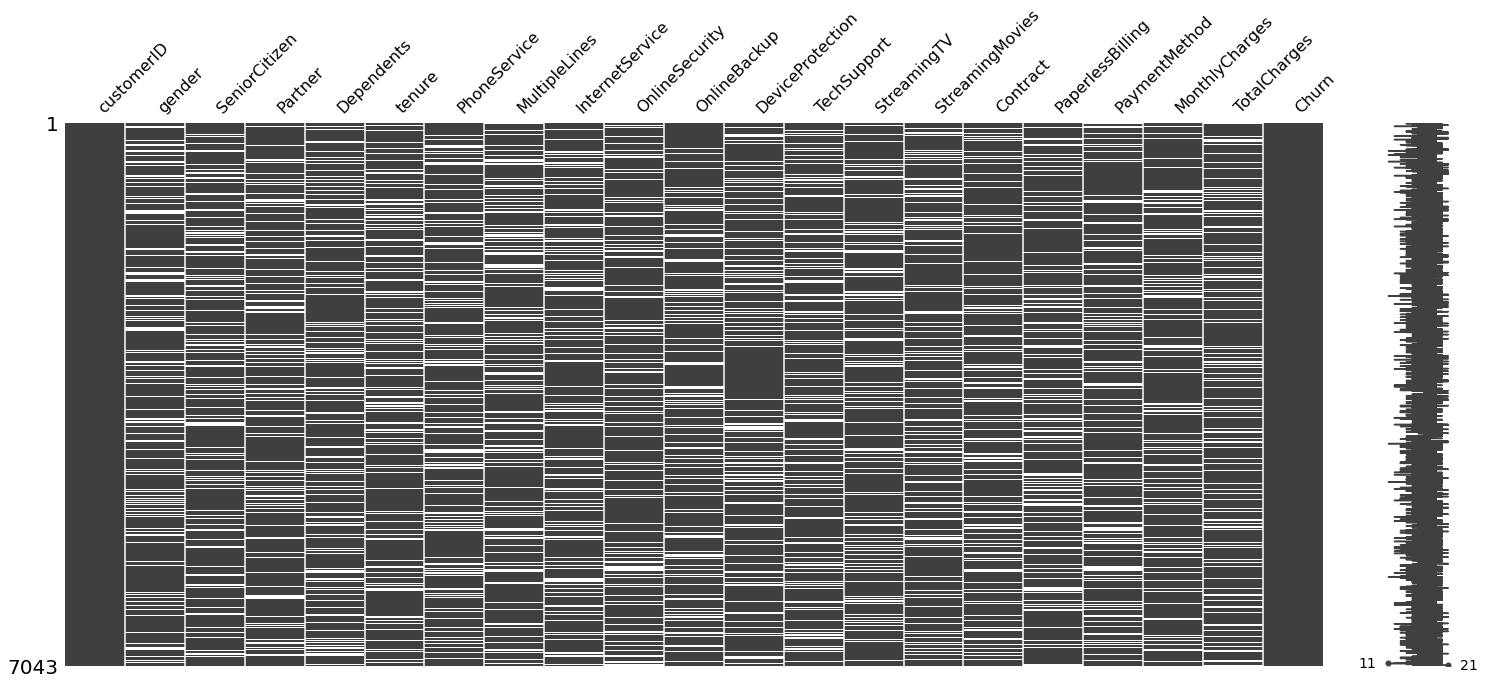

In [128]:
# See data with missing values
msno.matrix(data)

In [23]:
# See info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            5691 non-null   object 
 2   SeniorCitizen     5631 non-null   float64
 3   Partner           5640 non-null   object 
 4   Dependents        5665 non-null   object 
 5   tenure            5652 non-null   float64
 6   PhoneService      5620 non-null   object 
 7   MultipleLines     5578 non-null   object 
 8   InternetService   5545 non-null   object 
 9   OnlineSecurity    5674 non-null   object 
 10  OnlineBackup      5635 non-null   object 
 11  DeviceProtection  5590 non-null   object 
 12  TechSupport       5665 non-null   object 
 13  StreamingTV       5557 non-null   object 
 14  StreamingMovies   5657 non-null   object 
 15  Contract          5590 non-null   object 
 16  PaperlessBilling  5620 non-null   object 


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5631.0,0.158942,0.365654,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5652.0,32.496055,34.520803,-89.202297,7.963152,31.413126,56.557919,147.851618
MonthlyCharges,5665.0,64.707861,38.143987,-71.840199,37.016248,65.836955,92.790829,178.050208
TotalCharges,5662.0,2290.438131,2275.132780,-33.654488,396.952825,1406.030443,3835.632689,8719.130567


### Using Corrupted Data From Now On

In [129]:
# Writing corrupted data back to csv
corr_path = "C:/Users/termi/Desktop/corrupted_data.csv"
data.to_csv(corr_path, index=False)